# End-to-end Machine Learning project using Scikit-learn

This tutorial follows a step by step end-to-end analysis of a dataset using Machine Learning.

The workflow is the following:
1. Look at the big picture
2. Get the data
3. Discover and visualise the data to gain insights
4. Prepare data for Machine Learning algorithms
5. Select model and train it
6. Fine-tune model
7. Present solution; Launch, monitor, and maintain system

The aim of the analysis is to predict median house prices in Californian districts. 

Based and adapted from https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

## 1. Look at the big picture.
See lecture slides for further discussion on what this step involves.

## 2. Get the data

In [1]:
# Import packages
import pandas as pd
import numpy as np

The data has been prepared for you. Start by downloading the data from Canvas or GitHub and loading the data into Python. You might have to change the path to the file depending on where it is saved on your computer.

In [2]:
# Load data
data = pd.read_csv('HousingData.csv')

Let's quickly explore the dataset. Start by looking at the first five observations (data points). This allows us to see the variables in the dataset and it's a good preview of the type of data (e.g. numerical, categorical) for each variable.

In [3]:
# Preview first rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Next we are going to check for missing values and for the actual data types using the .info() method.

In [4]:
# Check for missing data and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As can be seen from the output of info(), most variables do not contain missing data but total_bedrooms does. This will be addressed later in the project. Now we are going to summarise the data in terms of its summary statistics. What is the mean, standard deviation, max, min, for each variable? This gives us a sense of how the data is distributed and the existance of outliers and differences in scale between variables.

"The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37." (Géron, Aurélien. "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow").

In [5]:
# Describe() is a good method to use to give you an idea of the distribution of each variable 
# and why scaling the data is a good idea.
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another way of getting a quick look at the entire dataset before starting a more formal exploratory analysis of the data is to use the following plotting functions. What can you tell from the histograms for each variable? "A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)."
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow ". Check here for more information on what a histogram is: https://www.mathsisfun.com/data/histograms.html 

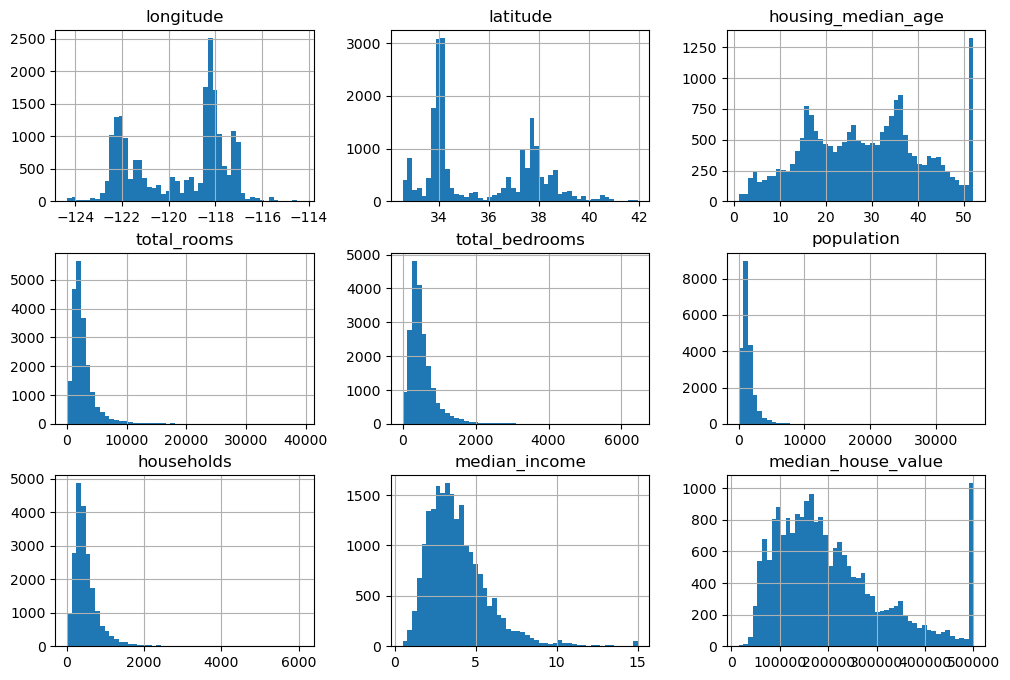

In [6]:
# Let's start by exploring the data using matplotlib histograms
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12, 8))
plt.show()

<span style="color:orange">TO DO: What can you conclude from the histograms? Do you see anything odd in the data, for example in median_house_prices?</span>


The variable 'Ocean Proximity' is categorical. To understand how many categories there are in the dataset and how many observations per category, we can use the following code:

In [7]:
# There are 5 categories in ocean proximity and they are highly imbalanced. 
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Visualize this information:

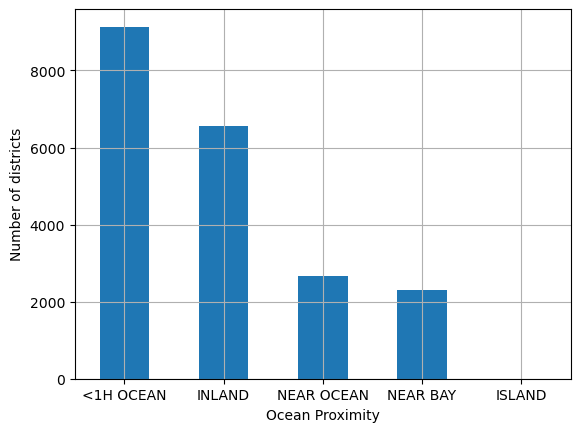

In [8]:
data["ocean_proximity"].value_counts().plot.bar(rot=0, grid=True)
plt.xlabel("Ocean Proximity")
plt.ylabel("Number of districts")
plt.show()

<span style="color:orange">TO DO: Can you think of other plots or other ways to look at the data before a more formal exploration?</span>

<span style="color:orange">TO DO: What have we learned from the data so far?</span>

<span style="color:orange">TO DO: Do you think it's possible to predict median house prices from the variables in the dataset?</span>

<span style="color:orange">TO DO: Is there something we need to pay attention to or be careful with going forwards with the analysis?</span>

### Create test set
Before we continue it's important to create a test dataset, where we are going to evaluate our machine learning model on. The test set cannot be used to influence our decisions on the modelling process and therefore needs to be set aside and only used in the evaluation phase of the project. The easiest way to create a test set is to use scikit learn functionality, for example:

In [9]:
# Import split function from scikit learn
from sklearn.model_selection import train_test_split

# The simplest slipt breaks the data into 80% for trainign and 20% for testing/evaluation 
# (the random state fixes how the data is randomly selected, so that it's always the same split everytime we run this cell)
dtrain, dtest = train_test_split(data, test_size=0.2, random_state=0)

Before we continue, we need to ask some questions of the test set:

- How well does it represent the entire dataset?

- Are we selecting from one category more/less than we should?

- How good is it at representing the population so that we can trust the evaluation results?

For this particular dataset it might be better to stratify the train/test split by median income. This is because the median income variable is a good predictor for median house prices and knowledge of the data has shown that a simple random split of the data creates a test set that doesn't represent the distribution of median incomes. So the following lines of code use a function of scikit learn for splitting the data into train and test sets that respect how the median income variable is distributed.

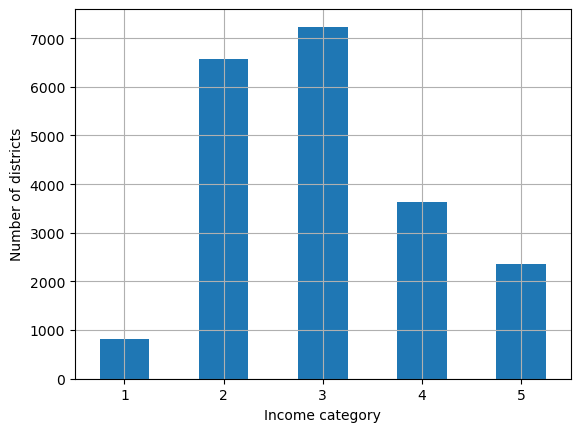

In [10]:
# First the median income variable is categorised into 5 different groups of income
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Now let's create train and test sets that preserve the distribution of the income category.

In [11]:
# Now the data can be split respecting these categories
from sklearn.model_selection import StratifiedShuffleSplit

# Produce indices for training and test observations
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(data, data["income_cat"]):
    dtrain = data.iloc[train_index].copy()
    dtest = data.iloc[test_index].copy()

Check if the stratification worked correctly:

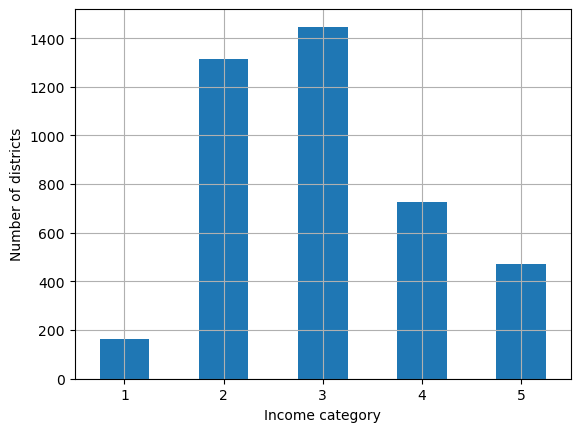

In [12]:
dtest["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Delete the extra column we have just created for income category. It is no longer needed.

In [13]:
# Now delete the extra column for income category that is not needed for the Machine Learning analysis
for set_ in (dtrain, dtest):
    set_.drop("income_cat", axis=1, inplace=True)

Our test set now has a similar distribution of median incomes as the training data as can be confirmed by the above histograms. 

<span style="color:orange">TO DO: Can you think of other variables that could also be used to stratify the train/test split?</span>

## 3. Discover and visualise the data to gain insights

"So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go into a little more depth."
Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

First create a copy of the training data for exploration so that nothing happens to the original data while this step takes place.

In [14]:
# Creates deep copy of training data
housing = dtrain.copy()

Since we have variables for latitute and longitude we can visualise some of the data geographically. For example, we can plot the population size for each district (using the latitude, longitude variables) and colour code them by median house price in the same district:

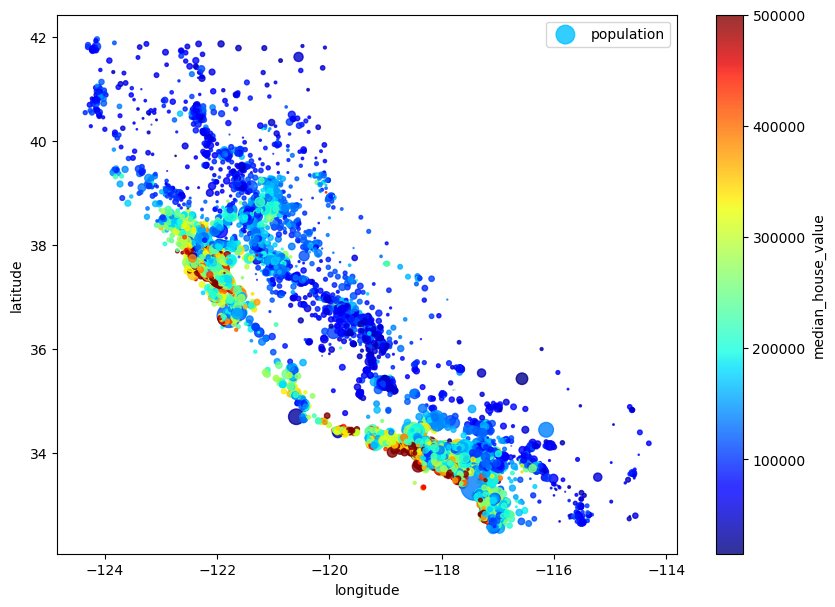

In [15]:
# Visualise population size and median house prices spatially
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

<span style="color:orange">TO DO: What do you conclude from the above plot?</span>

<span style="color:orange">TO DO: Is there a particular variable from the dataset that is predictive of high median house prices in general?</span>

<span style="color:orange">TO DO: Try other spatial visualisations of the data or other variables in the same type of plot as above?</span>

Another very useful plot to get a look at the data is the pairplot from seaborn. In this case there are too many variables and the plot becomes slow, so you could make a selection of numerical variables of interest, and colour them using a categorical variable, in our case 'Ocean Proximity'. This plot allows one to get a better sense of the distribution of each variable (is it bell shaped, does it have multiple peaks?) and how variables correlate (have a linear relationship) with each other.

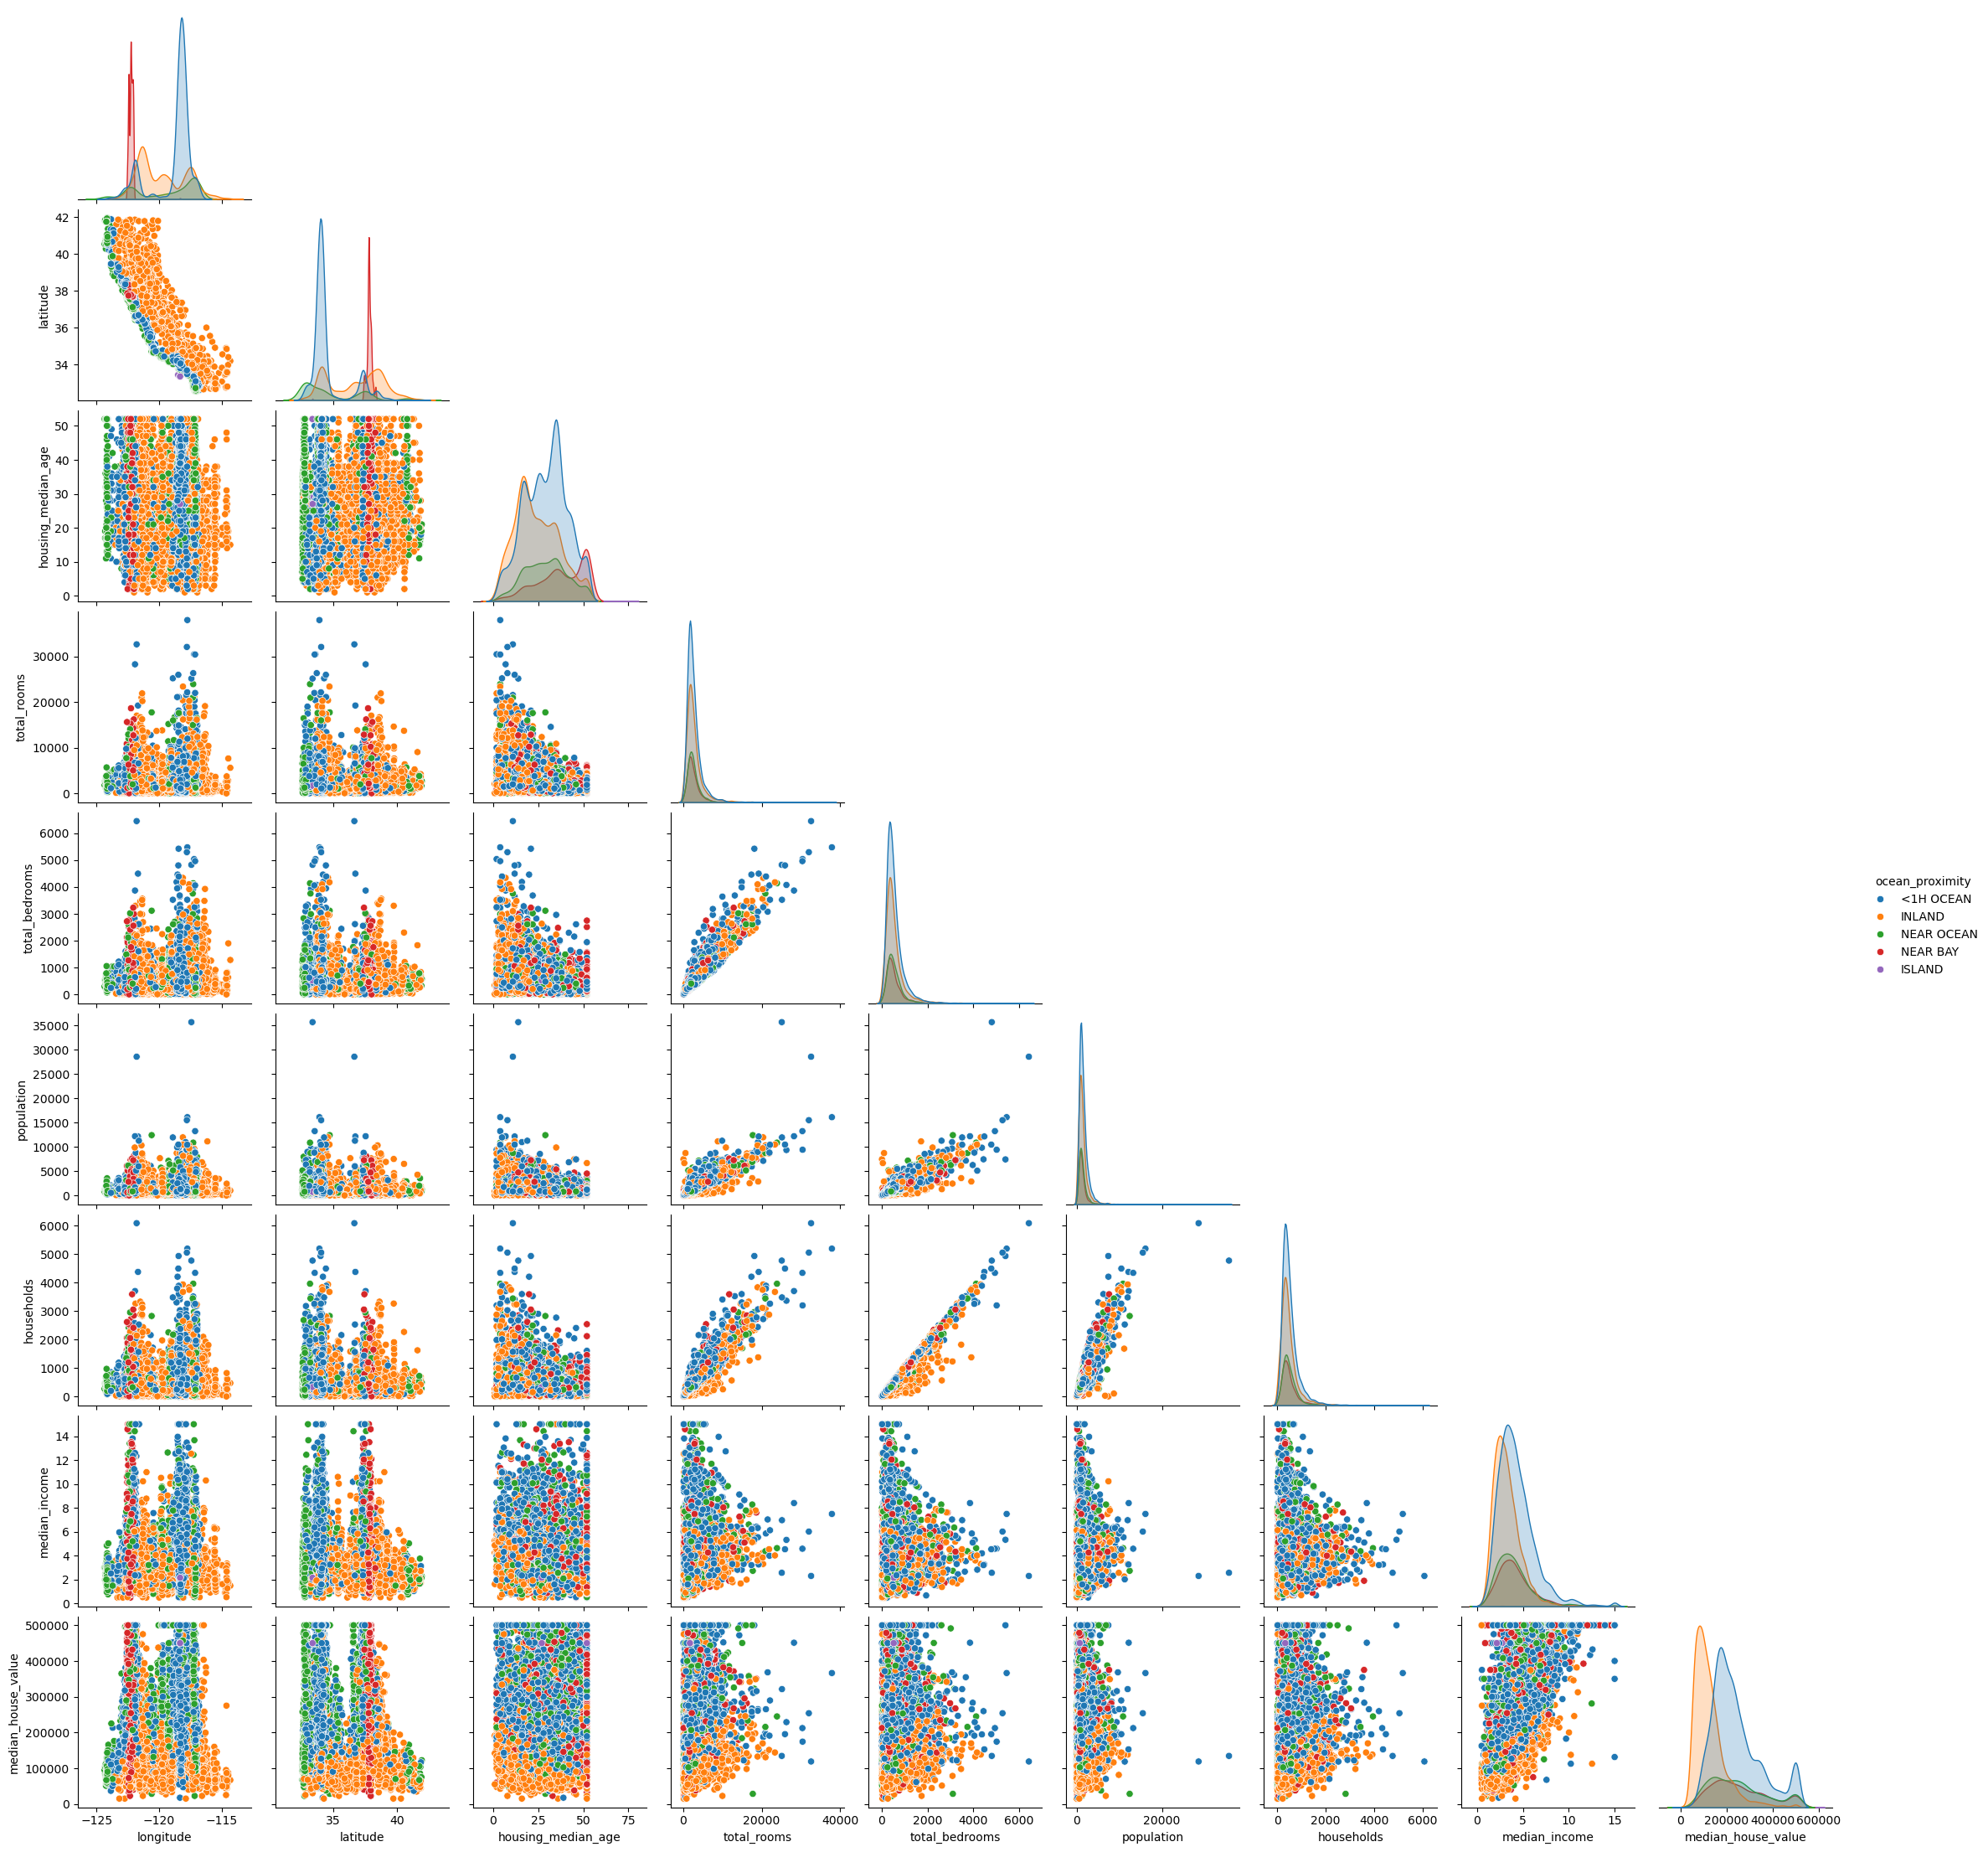

In [16]:
# Load seaborn and use pairplot to visualise the data
import seaborn as sns
sns.pairplot(housing, corner=True, hue="ocean_proximity")

To get a better estimate of the correlation (linear relationship) between pairs of variables, one can use the corr method.

In [17]:
# Calculate pair-wise correlations between variables and display correlations with the median house price
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690047
total_rooms           0.139320
housing_median_age    0.107589
households            0.070065
total_bedrooms        0.052883
population           -0.020588
longitude            -0.043439
latitude             -0.146360
Name: median_house_value, dtype: float64

The above values confirm what we observe in the pairplot. For more information on correlation and how different correlation values translate into different plots see here:
https://en.wikipedia.org/wiki/Correlation

The highest correlation seems to be between median house values and median income, and we can plot these two variables in a separate scatter plot to confirm:


<Axes: xlabel='median_income', ylabel='median_house_value'>

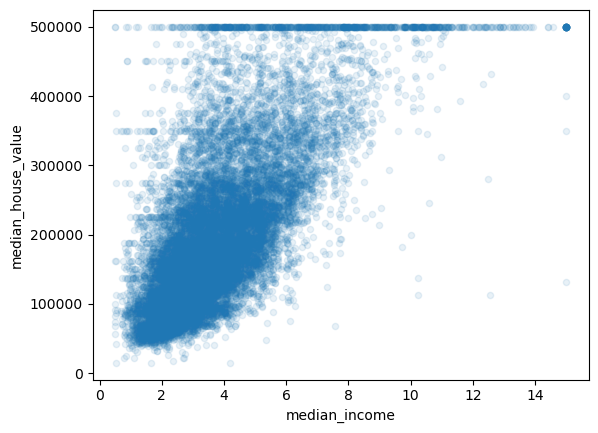

In [18]:
# Scatter plot of median house values and median income
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

<span style="color:orange">TO DO: Do you see anything strange in the above figure?</span>

<span style="color:orange">TO DO: Is there anything that you think would lead to problems with the Machine Learning algorithm?</span>

### Feature Engineering

Before we finish our exploration we could try to think of variables that we don't have in the dataset but that could be more predictive of median house prices. These new variables could be combinations of existing variables, such as the number of rooms per household, the number of bedrooms per room, the population size per household.

In [19]:
# Create new variables using combinations of existing variables
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

If we now compute again the correlations, we can see that some of our combined new variables better correlate with the target variable, the median house prices, than the original variables.

In [20]:
# Recalculate correlations and show correlations with median house prices by descending order
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690047
rooms_per_household         0.177089
total_rooms                 0.139320
housing_median_age          0.107589
households                  0.070065
total_bedrooms              0.052883
population                 -0.020588
population_per_household   -0.024845
longitude                  -0.043439
latitude                   -0.146360
bedrooms_per_room          -0.259403
Name: median_house_value, dtype: float64

<span style="color:orange">What other things could you do to explore this dataset before continuing to do Machine Learning?</span>

Now that we have a better understanding of the data, we know that some variables correlate well with the target, we know that there are missing values and that the variables have different ranges, we can start preparing the data for the Machine Learning algorithms.

One important thing to note: the above plots have shown that some variables seem to have a cap (censored data). For example, the target variable median_house_value has a cap on 500000. There are no prices above this value. This is an artificial cap and could lead to problems when we introduce the algorithm in a production environment. It would may not be able to make predictions above 500000. If this is expected then it is not a problem, but if the expectation is that the algorithms make predictions even above 500000 then we need to deal with this issue. Two ways of dealing with this could be: 1. collect better data that is not capped (or collect the actual values of the capped data); 2. remove this points from the dataset.

In this tutorial we will not address this issue but this is something to think about in a real world analysis of a similar dataset.

## Prepare the Data for the Machine Learning Algorithms

Let's use a clean dataset again (not the one used for exploring the data). And let's separate our predictors/features (X data) from the targets/what we are trying to predict (y).

In [21]:
# Create new training datasets (X and y)
Xtrain = dtrain.drop("median_house_value", axis=1)
ytrain = dtrain["median_house_value"].copy()

### Data Cleaning

In general, Machine Learning algorithms do not deal well with missing data. As we know we have some missing data. We need to address this issue first.

To deal with missing data, there are in general three options:
1. Get rid of the corresponding observations with missing data.
2. Get rid of the whole attribute/variable.
3. Replace the missing values (e.g., using the median of that feature).

Pandas has very useful functionality to implement these three options, for example (do not run the code below):

In [ ]:
# Do not run this cell!
housing.dropna(subset=["total_bedrooms"]) # option 1

housing.drop("total_bedrooms", axis=1) # option 2

median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

"If you choose option 3, you should compute the median value on the training set and use it to fill the missing values in the training set. Don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data." Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

Scikit-Learn also provides functionality to deal directly with missing data. For example, we can impute the missing data using the median as follows:


In [23]:
# Load Imputer from scikit learn and create new imputer object for the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
# The median cannot be calculated on non-numerical data so let's create a copy 
# of the dataset without the ocean proximity variable.
Xtrain_num = Xtrain.drop("ocean_proximity", axis=1)

We can compute the median using the fit method of the imputer, and check the result for each variable as follows:

In [27]:
# Calculate the median using the Imputer
imputer.fit(Xtrain_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  437.    , 1167.    ,
        410.    ,    3.5351])

In [25]:
# You can double check that the imputer is working by creating the median directly
Xtrain_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  437.    , 1167.    ,
        410.    ,    3.5351])

The final step to deal with missing data is to transform the training data using the imputer and its estimated statistics (in this case the median). Using scikit learn this is achieved by using the transform method and passing the training numerical data with the missing values to be imputed as argument:

In [28]:
# Apply the transformation (imputing the median for all missing values) on the training data
Ximp = imputer.transform(Xtrain_num)

# Convert to Pandas dataframe if needed.
Ximp = pd.DataFrame(Ximp, columns=Xtrain_num.columns, index=Xtrain_num.index)
Ximp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 19370 to 9733
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Variables

After cleaning the numerical data, we can look at the non-numerical features of the dataset. The Machine Learning algorithms in general do not work with text or non-numerical data without these data first being transformed to numerical features. In this dataset we have only one non-numerical feature, ocean proximity. This variable contains text data, but when we look at the number of unique values we can conclude that the text data refers to finite categories (categorical data):

In [29]:
# Categorical data and the categories
Xtrain_cat = Xtrain[["ocean_proximity"]]
Xtrain_cat['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7308
INLAND        5217
NEAR OCEAN    2119
NEAR BAY      1863
ISLAND           5
Name: count, dtype: int64

If the categories do not have a specific order, such as in ocean proximity, the best way to convert them to numerical data is to use a one-hot-encoding transformation. One hot encoding converts categorical data to numerical vectors (one-hot vectors). These vectors have a length equal to the number of categories. All entries are zero (cold), except for a specific category, which has an entry of 1 (hot). For example, if INLAND is the second category a one-hot vector for INLAND could be 0,1,0,0,0.

Scikit-learn has functionality to convert categorical data into one-hot vectors:

In [30]:
# One hot encode categorical variables using scikit-learn
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(Xtrain_cat)

# Check one hot encoding worked
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

### Feature scaling

One of the most important transformations needed before the data is passed to the Machine Learning algorithm is feature scaling. In general, algorithms don't work well when the input numerical features have very different scales. This is the case in the housing dataset:

In [31]:
# Again let's revisit the summary statistics of the dataset variables
Xtrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000
mean,-119.583639,35.645913,28.619489,2629.207909,537.292199,1420.610041,498.773801,3.874562
std,2.008598,2.138820,12.590031,2149.618521,418.181574,1127.883172,379.029941,1.906793
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1452.000000,296.000000,785.000000,280.000000,2.570075
50%,-118.510000,34.260000,29.000000,2127.000000,437.000000,1167.000000,410.000000,3.535100
75%,-118.010000,37.720000,37.000000,3142.000000,646.000000,1722.000000,605.000000,4.742300
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


In general, it is not necessary to scale the target variable (in our case the median house prices). The two most common ways to scale the input features are: min-max scaling and standardization.

"Min-max scaling (also known as normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. 

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. Scikit-Learn provides a transformer called StandardScaler for standardization." Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

It is important to fit the scalers only on the training data. The transformations are then applied to both the training and test data.

### Pipelines

The best and easiest way to apply all the transformations needed to prepare the data for the Machine Learning algorithm is to use a transformation pipeline. For example, we can create a pipeline for the numerical data (which involves imputing and scaling the data) and then another pipeline that applies the numerical pipeline and also deals with the categorical data.

In [33]:
# Copy the training data again to create the numerical dataset before imputation
Xtrain_num = Xtrain.drop("ocean_proximity", axis=1)

In [34]:
# Pipeline for the numerical features (imputation and scaling)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

Now let's combine the pipeline for numerical features (above) with the one-hot encoding transformation for categorical data. For this we can use the ColumnTransformer, which combines different pipelines for different variables in the dataset:

In [35]:
# Pipeline for processing numerical and categorical data (hot-one encoding) separately.
from sklearn.compose import ColumnTransformer

num_attribs = list(Xtrain_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

Xtrain_prepared = full_pipeline.fit_transform(Xtrain)

Our pipeline has imputed the missing numerical values and standardised the numerical data. It has also one hot encoded the categorical data.

<span style="color:orange">TO DO: Is there anything else we could do to prepare the data for Machine Learning?</span>

<span style="color:orange">TO DO: Can you use a custom pipeline to add the combined features we created above but didn't use?</span>

We are now ready to run the Machine Learning algorithms on this dataset and try to predict median house prices.

## Select and Train a Model

Now that we have got the data, we have created a training and test set, and we have prepared the data for Machine Learning (imputed missing values, scaled it, and transformed categorical variables into one-hot vectors) it is time to do some Machine Learning.

### Training and Evaluating on the Training Set

Let's start with the simplest regression algorithm, Linear Regresson. To train the model on the training data, simply import the model from scikit-learn, create an object and call the fit method using the training features and training labels (median house prices).

In [37]:
# Import and train Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Xtrain_prepared, ytrain)

LinearRegression()

Let's check the Root Mean Squared Error (RMSE) for this model on the training data:

In [38]:
# Import metric for evaluation and calculate metric for Linear Regression model
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = lin_reg.predict(Xtrain_prepared)

# Compare with real targets to calculate error
lin_mse = mean_squared_error(ytrain, predictions)
lin_rmse = np.sqrt(lin_mse)

# Output RMSE for Linear Regression
lin_rmse

68529.80914728741

"This is better than nothing, but clearly not a great score: most districts’ median_housing_values range between $120,000 and $265,000, so a typical prediction error of $68,529 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model." Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

Let's try a more powerful model, Decision Trees:

In [39]:
# Import Decision Trees for regression
from sklearn.tree import DecisionTreeRegressor

# Train model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Xtrain_prepared, ytrain)

# Make predictions and compare with real targets
predictions = tree_reg.predict(Xtrain_prepared)
tree_mse = mean_squared_error(ytrain, predictions)
tree_rmse = np.sqrt(tree_mse)

# Output RMSE
tree_rmse

0.0

Now we are in the opposite situation. The error is zero! It's very likely that the model has badly overfit the data. Let's try a third model, Random Forest Regression.

In [40]:
# Import Random Forests for regression
from sklearn.ensemble import RandomForestRegressor

# Train model
forest_reg = RandomForestRegressor()
forest_reg.fit(Xtrain_prepared, ytrain)

# Make predictions and compare with real targets
predictions = forest_reg.predict(Xtrain_prepared)
forest_mse = mean_squared_error(ytrain, predictions)
forest_rmse = np.sqrt(forest_mse)

# Output RMSE
forest_rmse

18005.126863947717

It's better than Linear Regression and it doesn't seem to overfit as much as the Decision Trees. 

To compare the performance of different algorithms, we need to create a validation set. We cannot use the test set to compare algorithms or make any other decisions. So if we are going to evaluate different models, or different choices of parameters or any other aspect of the pipeline we need to create a separate set for evaluation. We can either simply split the training data again into training and test sets, or use cross-validation, which creates multiple splits of the data, where in which split we have a train and validation set. We can then average the error on this validation set across splits. Cross-validation not only gives the mean error but also the standard deviation.

Let's compare the algorithms we trained so far using cross-validation (10 splits), for more information on cross-validation and scikit learn, see: https://scikit-learn.org/stable/modules/cross_validation.html 

In [41]:
# Import cross-validation functionality
from sklearn.model_selection import cross_val_score

# Calculate the error for different algorihtms using cross-validation 
# (10 splits of the data into training and validation datasets)
scores = cross_val_score(lin_reg, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
lin_scores = np.sqrt(-scores)
scores = cross_val_score(tree_reg, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
tree_scores = np.sqrt(-scores)
scores = cross_val_score(forest_reg, Xtrain_prepared, ytrain, scoring="neg_mean_squared_error", cv=10)
forest_scores = np.sqrt(-scores)

In [42]:
# Use the following code to display the errors and stds from cross-validation
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_scores)
display_scores(tree_scores)
display_scores(forest_scores)

Mean: 68755.2737314333
Standard deviation: 754.8599574674172
Mean: 68067.59673140051
Standard deviation: 1200.9954387834678
Mean: 48494.567907655284
Standard deviation: 1389.9676454659575


From 10-fold cross-validation it seems the best model is the Random Forest Regressor (lower average error). Let's now fine-tune (choose the best hyperparameters) for this model to try to make it even better. 

<span style="color:orange">TO DO: Try other Machine Learning regression algorithms.</span>

## Fine-Tune Your Model

### Grid Search

One option to choose the best hyperparameters (parameters that are not learned during training) is to search for them manually. This is time consuming, not very reproducible and difficult to automate. It's best to use one of the standard approaches such as grid search. Scikit learn provides functionality for fine tuning.

You can find more information about Random Forest Regression and the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

More information on grid search cross validation can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Other steps of the preprocessing of the data can be considered hyperparameters and be tuned as well, for example different strategies for dealing with missing data, feature selection and different scaling methods.


In [43]:
# Import functionality for grid search
from sklearn.model_selection import GridSearchCV

# Choose hyperparameters to fine tune
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Load model
forest_reg = RandomForestRegressor()

# Use grid-search and cross-validation for fine tuning (here we use 5 folds/splits for cross-validation)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

# Train models (using different hyperparameters)
grid_search.fit(Xtrain_prepared, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

"The param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict, then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter). The grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, and it will train each model 5 times (since we are using five-fold cross validation). In other words, all in all there will be 18 × 5 = 90 rounds of training! It may take quite a long time." Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

You can find the best combination of parameters as follows:

In [45]:
# Output best combination of hyperparameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
# Check the results of cross-validation for all combinations of hyperparameters
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63471.76718829097 {'max_features': 2, 'n_estimators': 3}
54883.802070998296 {'max_features': 2, 'n_estimators': 10}
52149.22984922002 {'max_features': 2, 'n_estimators': 30}
59244.279538261726 {'max_features': 4, 'n_estimators': 3}
52642.14682999452 {'max_features': 4, 'n_estimators': 10}
50071.80388776508 {'max_features': 4, 'n_estimators': 30}
58594.49827856397 {'max_features': 6, 'n_estimators': 3}
51134.049382037345 {'max_features': 6, 'n_estimators': 10}
49748.69704766879 {'max_features': 6, 'n_estimators': 30}
57731.58468684634 {'max_features': 8, 'n_estimators': 3}
51689.333400355565 {'max_features': 8, 'n_estimators': 10}
49368.40882337206 {'max_features': 8, 'n_estimators': 30}
62308.728727832175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53696.89700383659 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59401.02594905818 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52357.643976827945 {'bootstrap': False, 'max_features': 3, 'n_estimator

### Randomized search

"The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration." Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow.

One of the advantages is that one can set the number of iterations and therefore control the computational cost of the total search. It's also easier to explore a wider range of hyperparameters with this approach because it doesn't use every single combination of hyperparameters like grid search does.

For more informaton on how to use randomized search see here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

<span style="color:orange">TO DO: Try using Randomized Search instead of Grid Search to find the best hyperparameters for the Random Forest algorithm.</span>


### Analyze the Best Models and Their Errors

It's good practice to explore the importance of each feature for the predictions of the model. Often this exercise helps to gain insights on the problem. 

In [47]:
# Obtain measure of feature importance for the best model
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.07850376e-01, 1.06550492e-01, 4.96137860e-02, 2.79889855e-02,
       2.72867046e-02, 3.67950030e-02, 2.42501360e-02, 4.43747696e-01,
       8.46818662e-03, 1.57503925e-01, 3.14672684e-04, 2.26521173e-03,
       7.36482397e-03])

Let's visualise each feature importance value next to the name of the feature:

In [49]:
# Get names of all variables in the dataset
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs

# Output feature importance value next to variable name
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4437476962025588, 'median_income'),
 (0.15750392516610115, 'INLAND'),
 (0.1078503761690297, 'longitude'),
 (0.10655049242558343, 'latitude'),
 (0.04961378604518362, 'housing_median_age'),
 (0.036795002957589064, 'population'),
 (0.02798898548757889, 'total_rooms'),
 (0.027286704581870897, 'total_bedrooms'),
 (0.02425013595730704, 'households'),
 (0.00846818662410811, '<1H OCEAN'),
 (0.007364823971141207, 'NEAR OCEAN'),
 (0.0022652117275387823, 'NEAR BAY'),
 (0.0003146726844092826, 'ISLAND')]

The most important features to predict the median price of a house seem to be the median income, if the district is INLAND and the longitude and latitude. This information could be used to remove unimportant features from the model or gain insights onto the problem.

<span style="color:orange">TO DO: To better visualise the feature importance results create bar plot with the above information.</span> For example: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

### Evaluate Your System on the Test Set

After selecting and fine tuning a model, eventually we'll have a model that performs sufficiently well on the validation data and we are happy to use the model on the test data. This is the final evaluation step and it's simple. We get the test data, apply the same transformations using the parameters obtained from the training data (in our case all we have to do is run the preprocessing pipeline on the test data - making sure we use transform() and not fit_transform()) and make new predictions using our best regression model comparing them with the true test labels.

In [52]:
# Load best model from fine tuning step
final_model = grid_search.best_estimator_

# Create test dataset 
Xtest = dtest.drop("median_house_value", axis=1)
ytest = dtest["median_house_value"].copy()

# Prepare the test set using the pipeline and transformations from the training data
Xtest_prepared = full_pipeline.transform(Xtest)

# Make predictions
final_predictions = final_model.predict(Xtest_prepared)

# Compare with real test targets
final_mse = mean_squared_error(ytest, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50394.79736338564

It could be useful to calculate a 95% confidence interval for the test error, using the following code:

In [49]:
# Import stats module
from scipy import stats

# Create confidence intervals
confidence = 0.95
squared_errors = (final_predictions - ytest) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([48102.90594658, 52692.97824717])

<span style="color:orange">TO DO: What do you conclude from the test error and 95% confidence interval? Is this model good enough for production?</span>

The Machine Learning analysis is finished! The next step would be to deploy and maintain the model but it is out of scope for this tutorial. If you'd like to learn more check the pdf for Chapter 2 of Géron's "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" book (.pdf available on Canvas).

<span style="color:orange">What else could you have done in this analysis? Some suggestions for additional things you could try doing on your own:</span>

- <span style="color:orange">Add the combined featues we created above to the model and retrain and evaluate the new model.</span>
- <span style="color:orange">Create a custom transformer that creates and adds the new combined features to the data and include it in the numerical pipeline.</span>
- <span style="color:orange">Save the model using joblib. Load a saved model.</span>

Congratulations! You finished an end-to-end Machine Learning project.